In [12]:
import pandas as pd

# Pfad zur CSV-Datei angeben
file_path = "nasdaq100_data/PEP.csv"  # Beispiel: Pfad zu deiner Datei

# CSV einlesen
df = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Prüfen, ob Daten vorhanden sind
if df.empty:
    print("Keine Daten in der Datei.")
else:
    # Letztes Datum
    last_date = df.index[-1].date()  # Nur YYYY-MM-DD
    print(f"Letzter Eintrag in {file_path}: {last_date}")

Letzter Eintrag in nasdaq100_data/PEP.csv: 2025-11-17


Es werden die letzten 500 Handelstage jeder Aktie visualisiert.


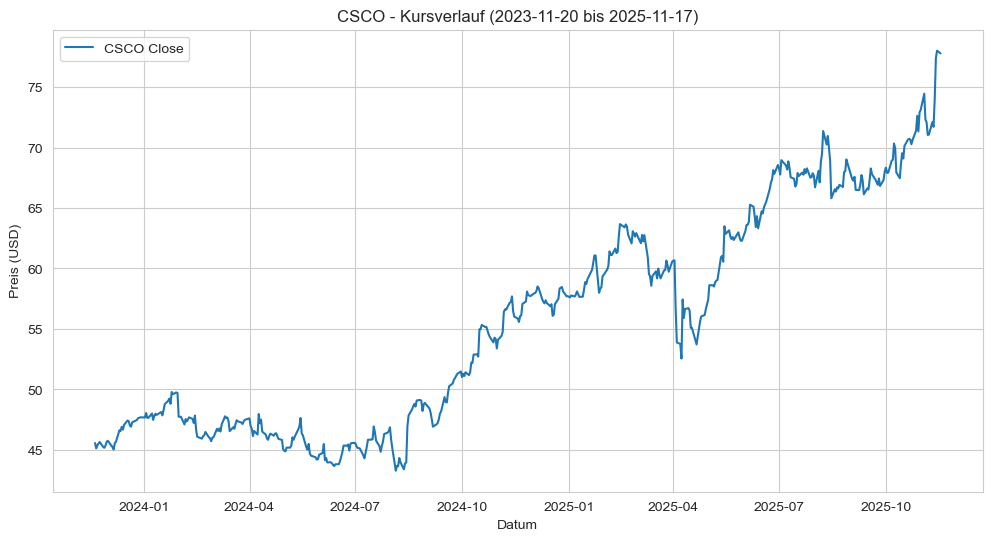

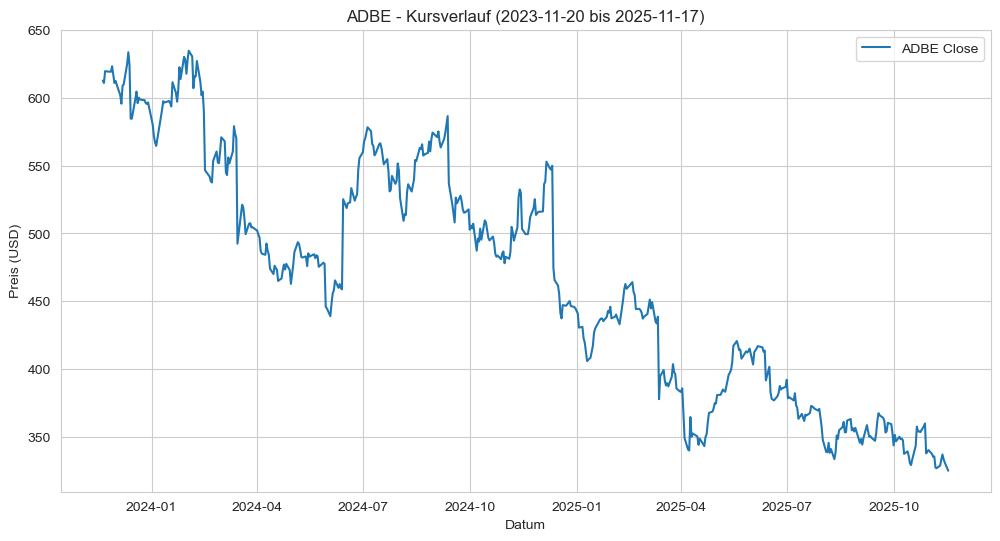

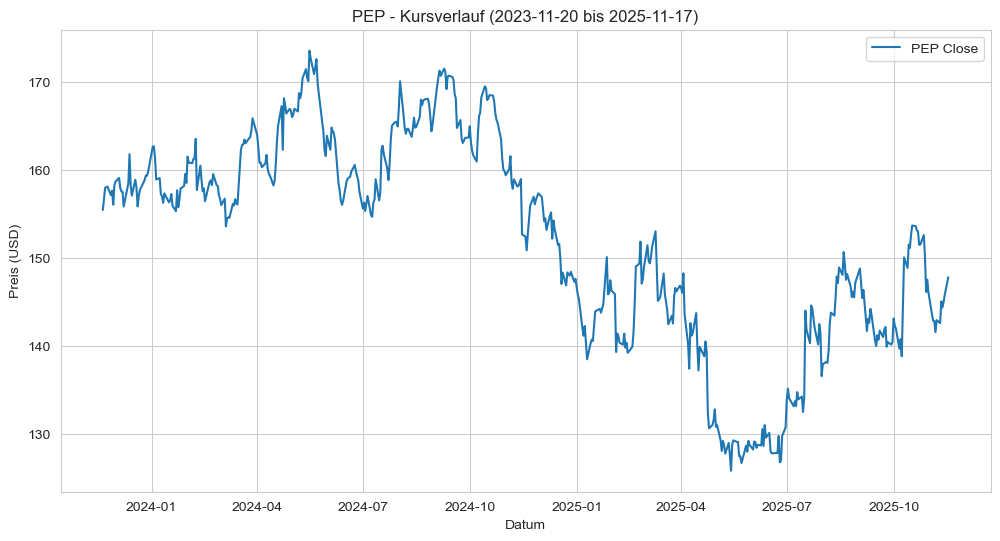

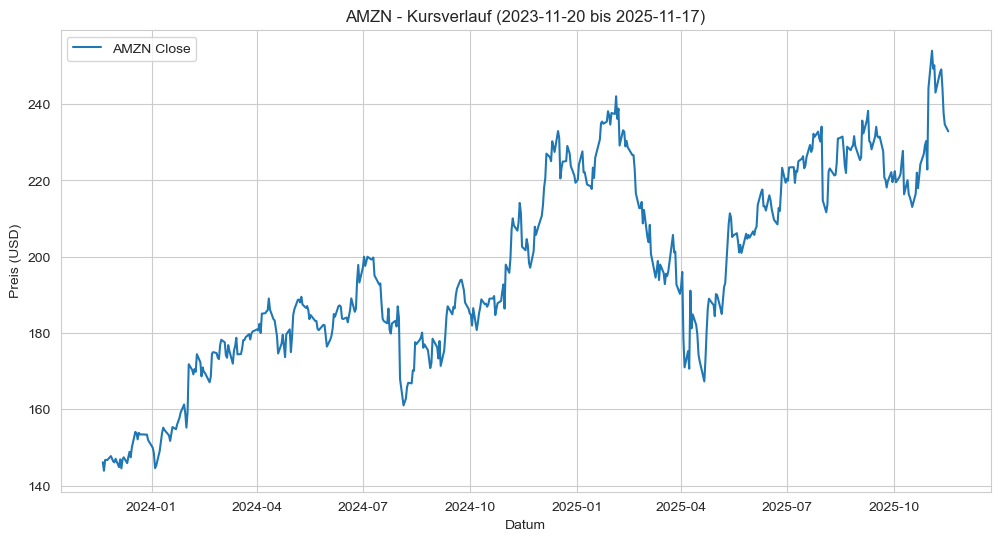

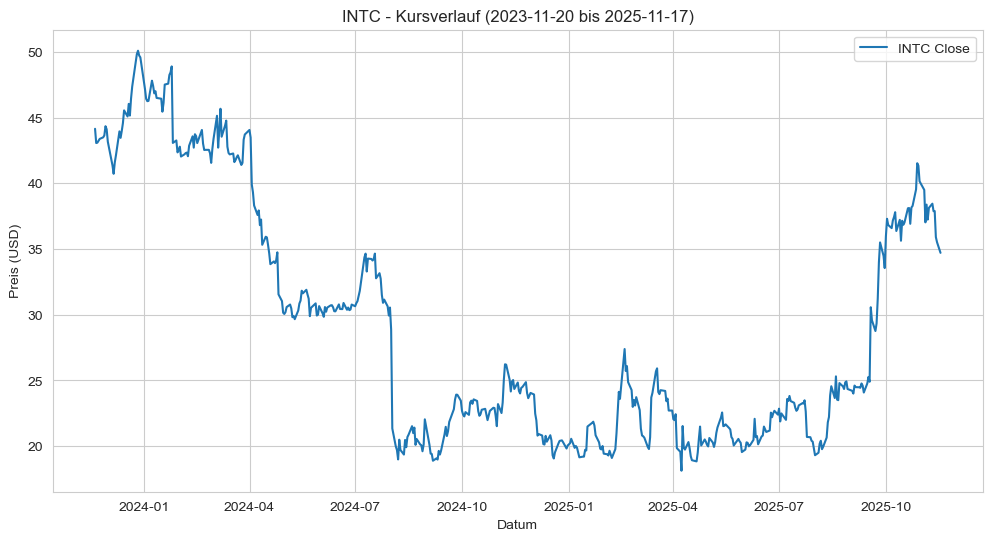

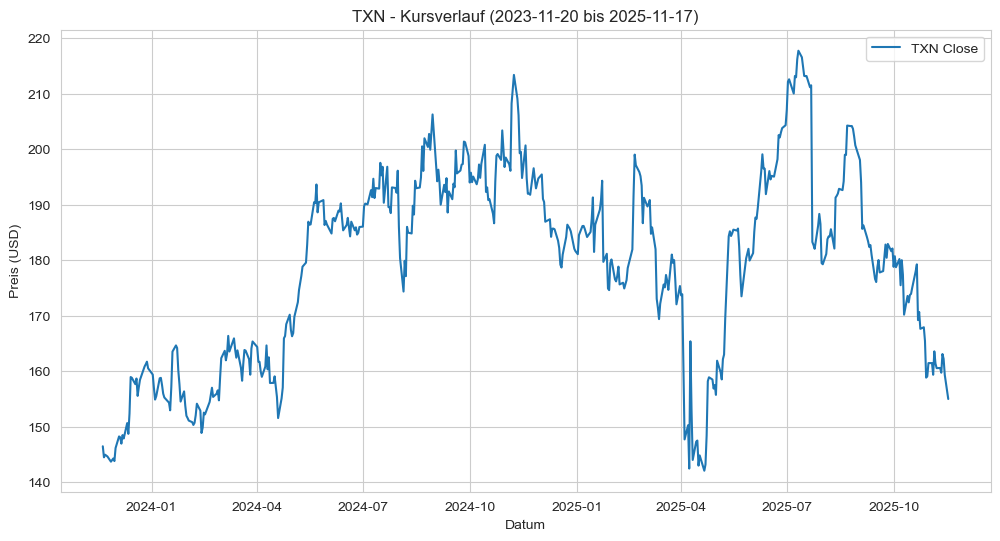

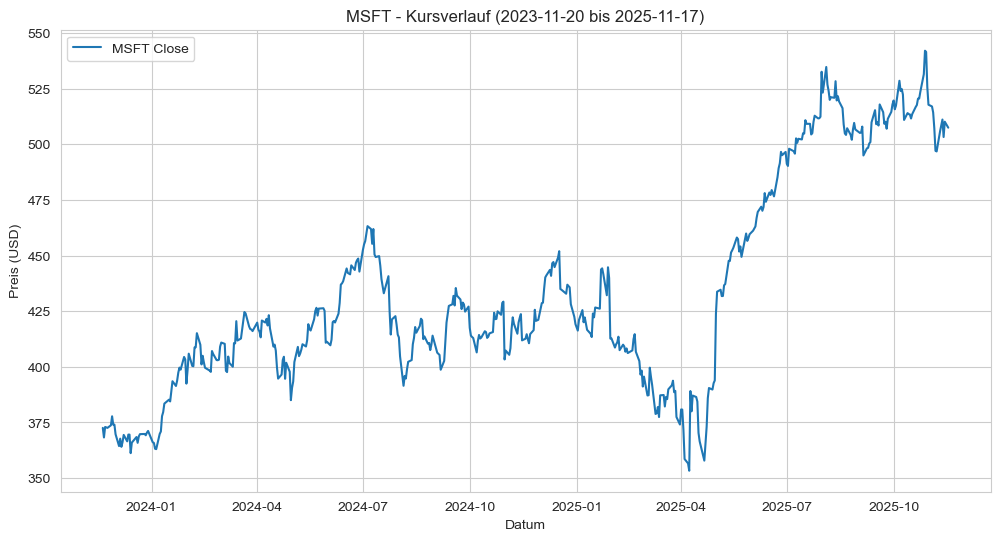

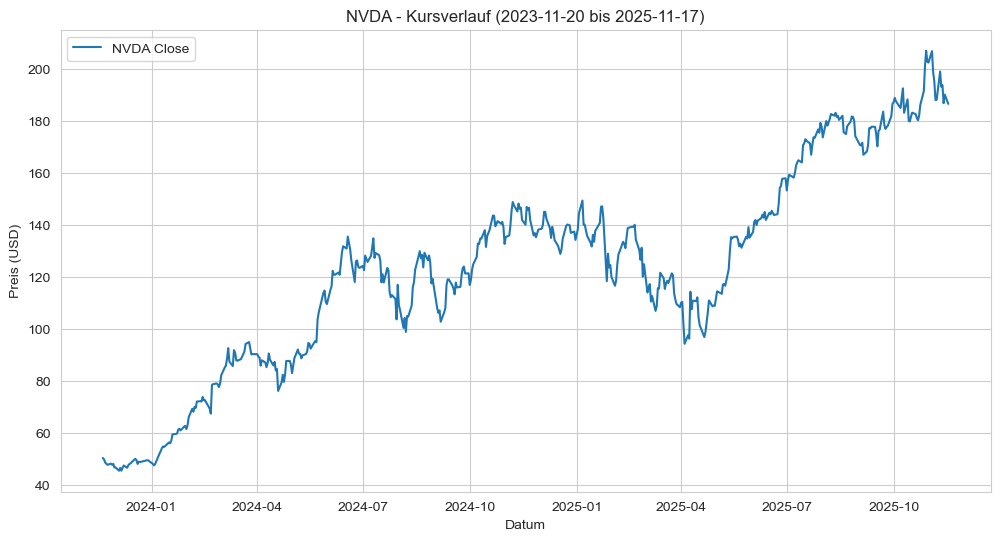

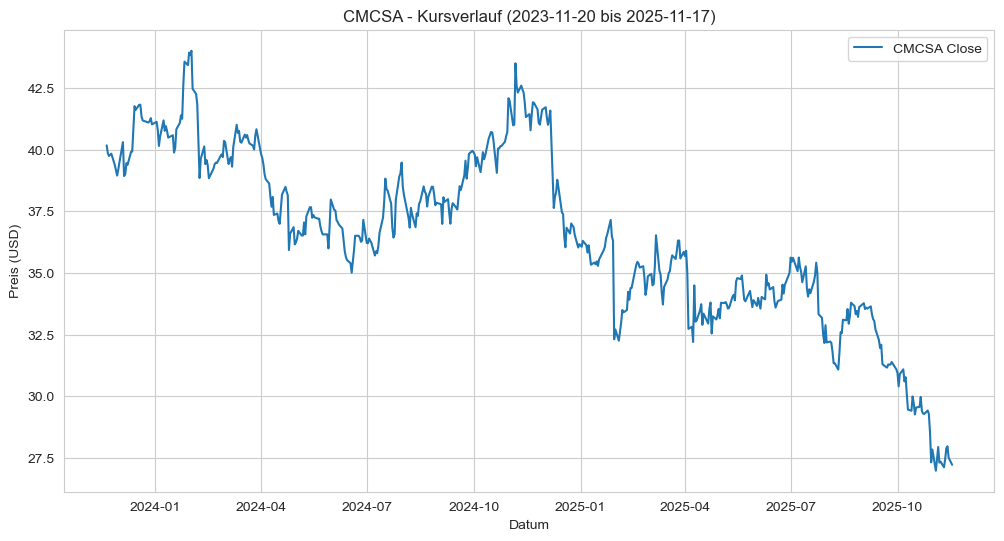

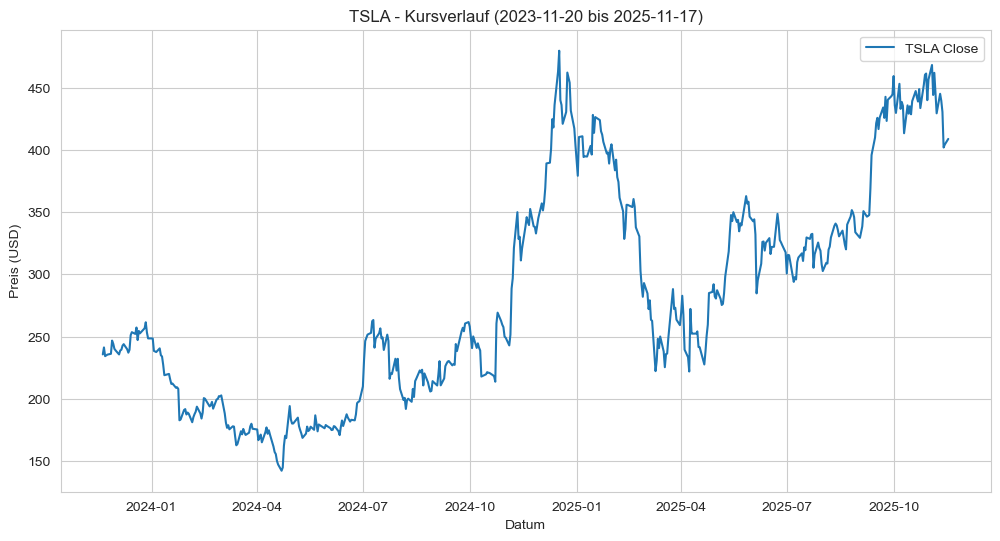

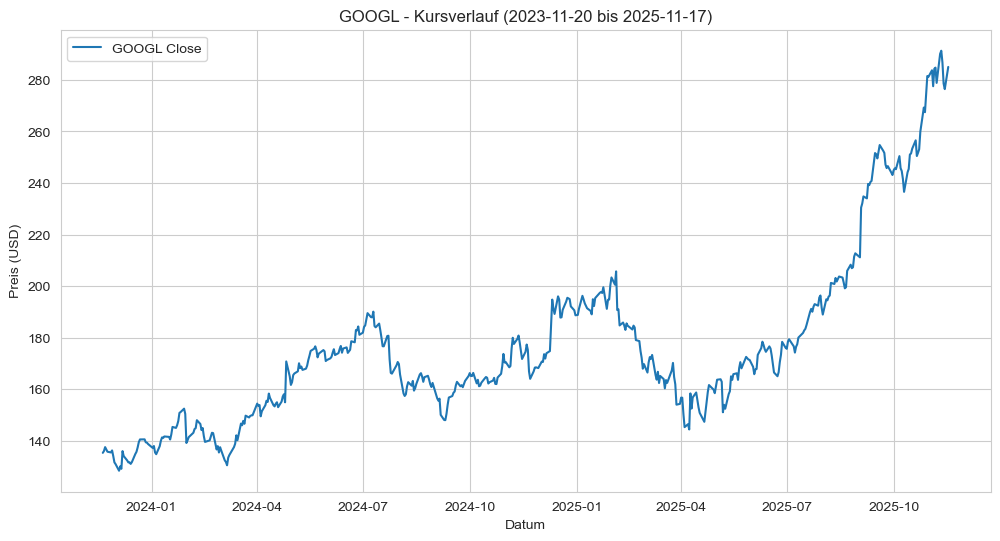

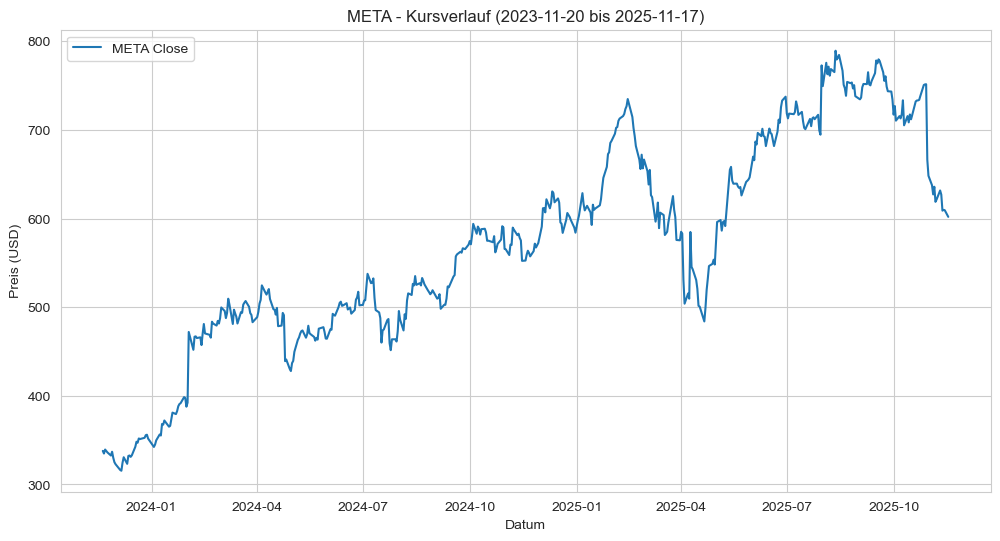

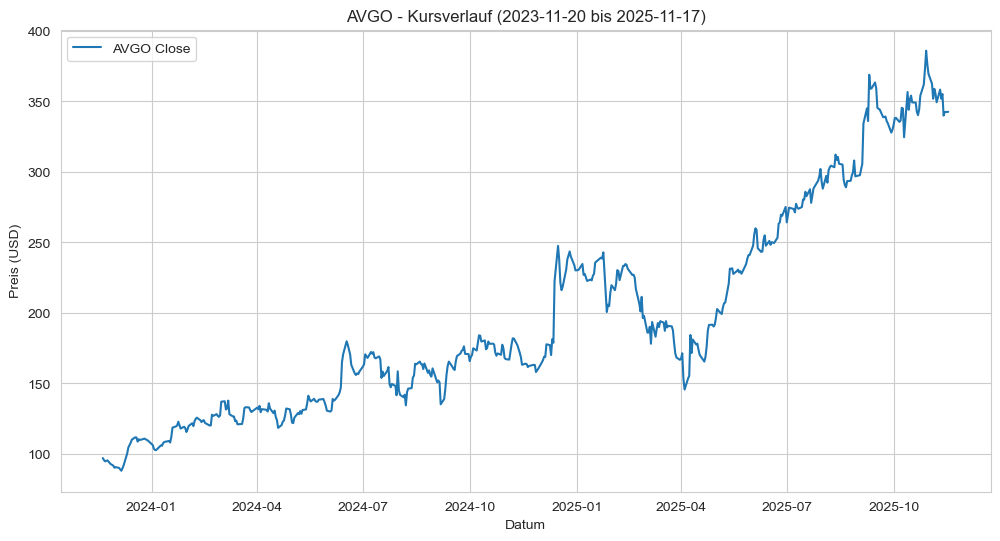

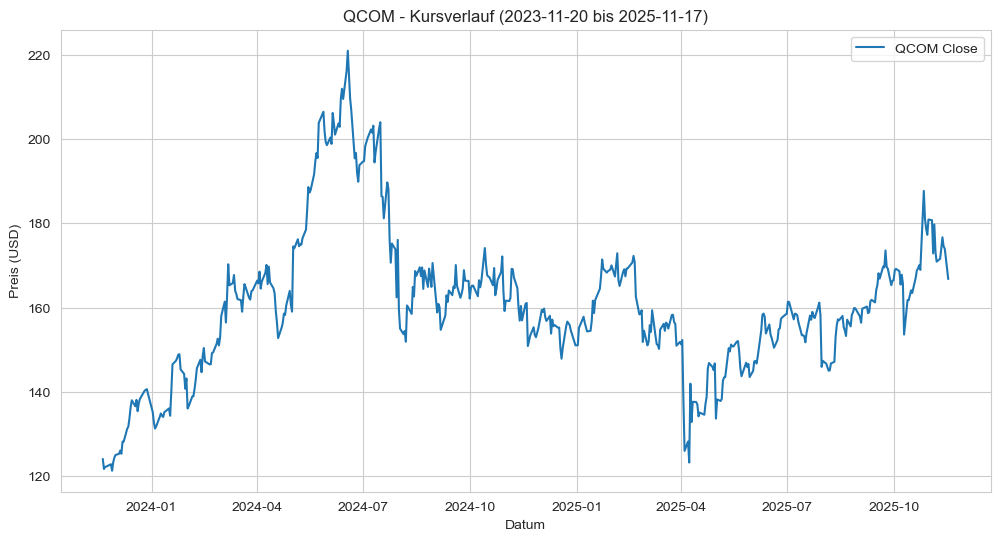

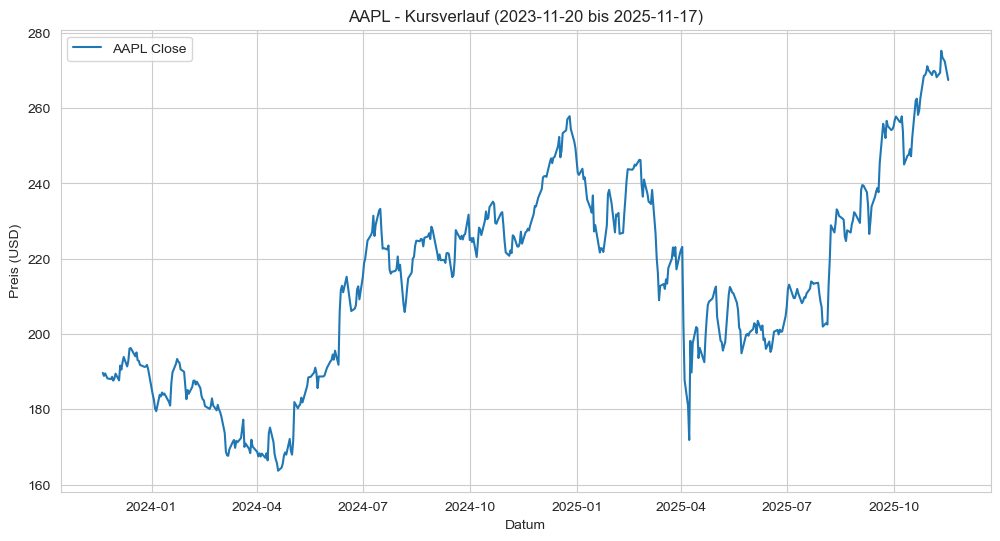

In [27]:
# pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# from datetime import datetime, timedelta # Diese Imports werden nicht mehr benötigt!
# from pandas import DateOffset # Diese Imports werden nicht mehr benötigt!

# Ordner, in dem deine CSVs liegen
data_folder = "nasdaq100_data"

# Alle CSV-Dateien im Ordner auflisten
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

# Optional: Ästhetik für Plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# NEUE DEFINITION: Anzahl der letzten Werte
# Angenommen: 250 Handelstage pro Jahr * 2 Jahre = 500 Werte (approx. letzte 2 Jahre)
# Wenn Sie 5 Jahre wollen, und es täglich Daten gibt: 5 * 365 = 1825 (aber 500 für 2 Jahre ist gängig)
NUM_LAST_VALUES = 500 

print(f"Es werden die letzten {NUM_LAST_VALUES} Handelstage jeder Aktie visualisiert.")

# Schleife über alle CSVs
for file in csv_files:
    ticker = file.replace(".csv", "")
    file_path = os.path.join(data_folder, file)
    
    # CSV einlesen
    df = pd.read_csv(file_path, index_col=0, parse_dates=True)
    
    # Check: Spalte "Close" vorhanden?
    if "Close" not in df.columns:
        print(f"Close-Spalte nicht gefunden in {ticker}, überspringe...")
        continue
        
    # ROBUSTERE FILTERUNG: Nimm die letzten N Zeilen des DataFrames
    # Dies ist immun gegen Zeitzonen-Fehler!
    df_filtered = df.tail(NUM_LAST_VALUES)

    # Optional: Wenn weniger als 500 Werte vorhanden sind, wird einfach alles genommen.
    if df_filtered.empty:
        print(f"Keine Daten für {ticker} gefunden, überspringe...")
        continue
    
    # Plot erstellen
    plt.figure()
    
    # NEU: Startdatum und Enddatum des gefilterten Bereichs für den Titel verwenden
    start_date = df_filtered.index.min().strftime('%Y-%m-%d')
    end_date = df_filtered.index.max().strftime('%Y-%m-%d')
    
    plt.plot(df_filtered.index, df_filtered["Close"], label=f"{ticker} Close")
    plt.title(f"{ticker} - Kursverlauf ({start_date} bis {end_date})")
    plt.xlabel("Datum")
    plt.ylabel("Preis (USD)")
    plt.legend()
    plt.show()

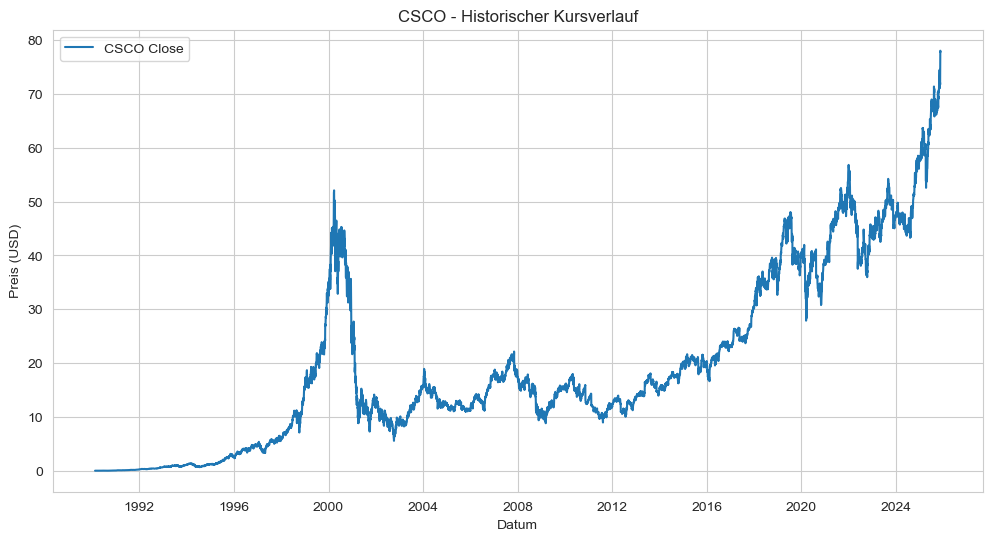

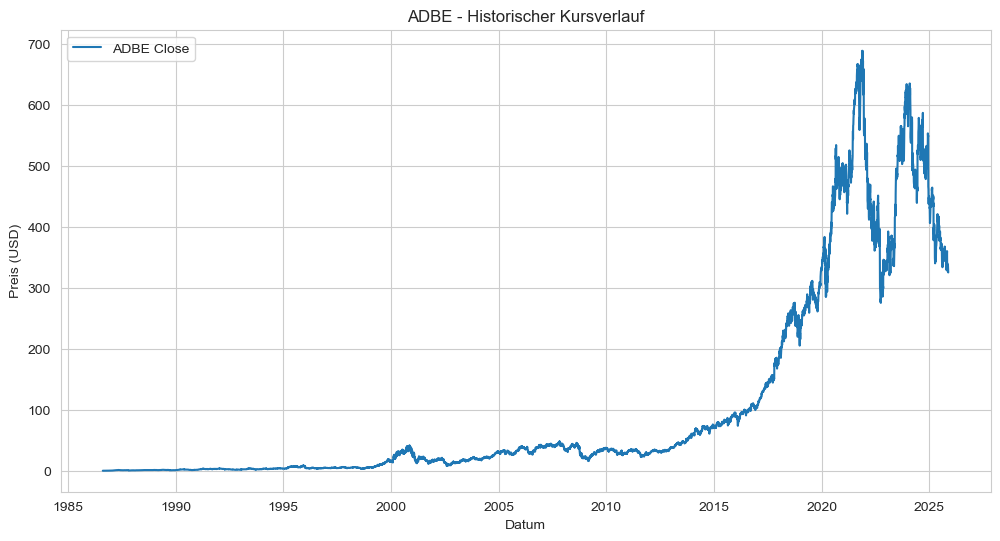

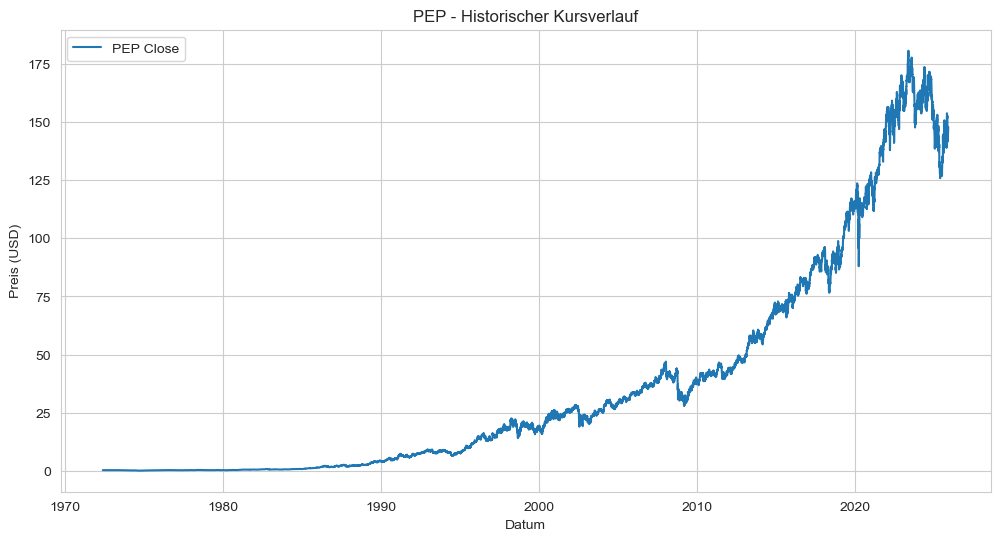

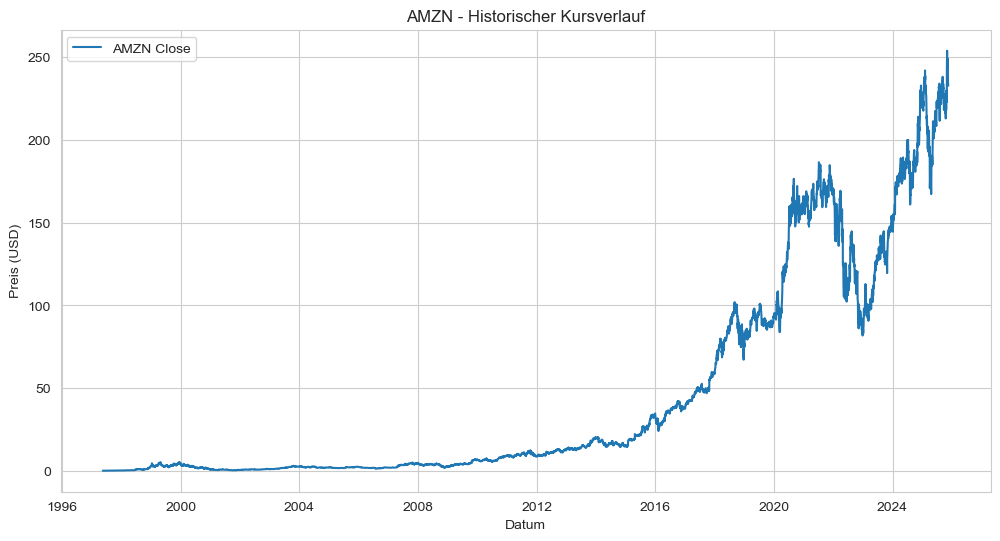

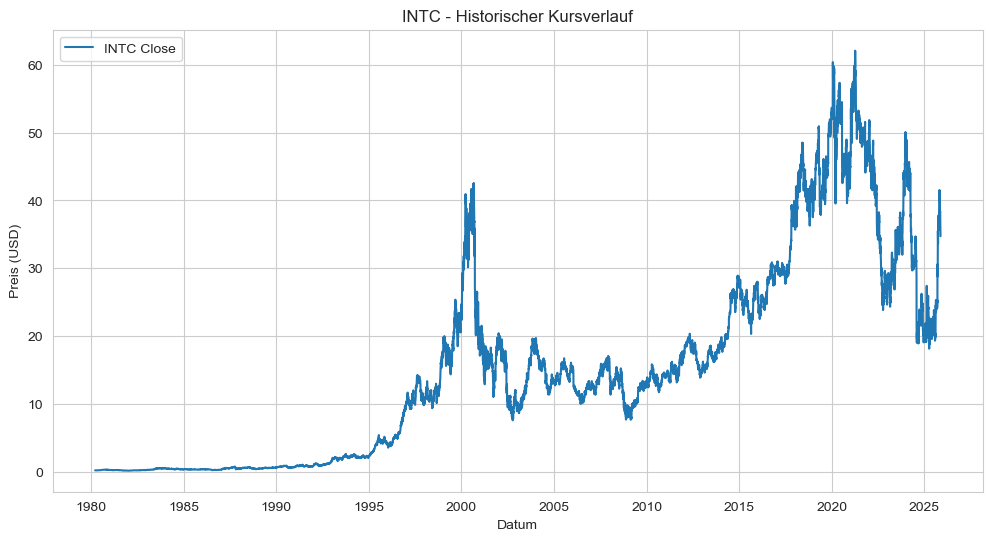

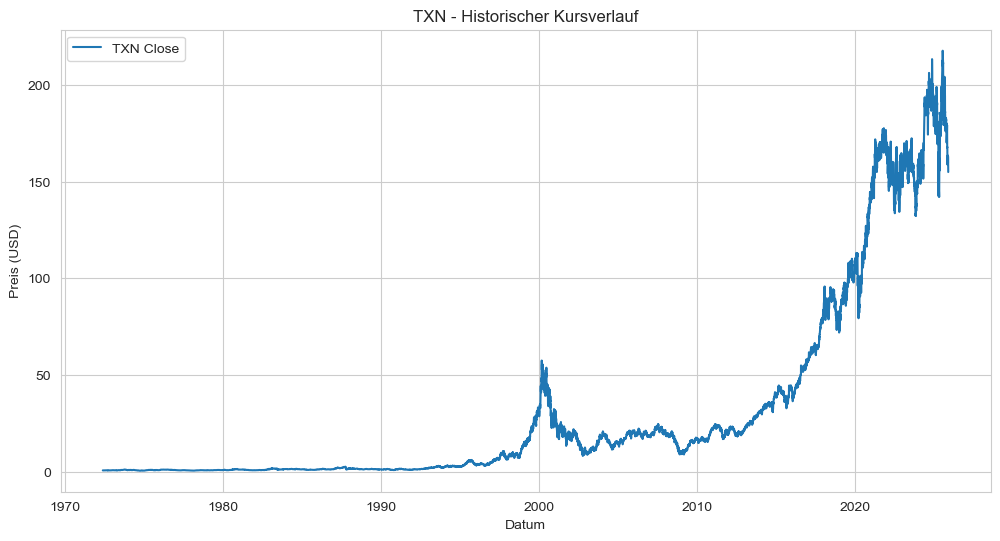

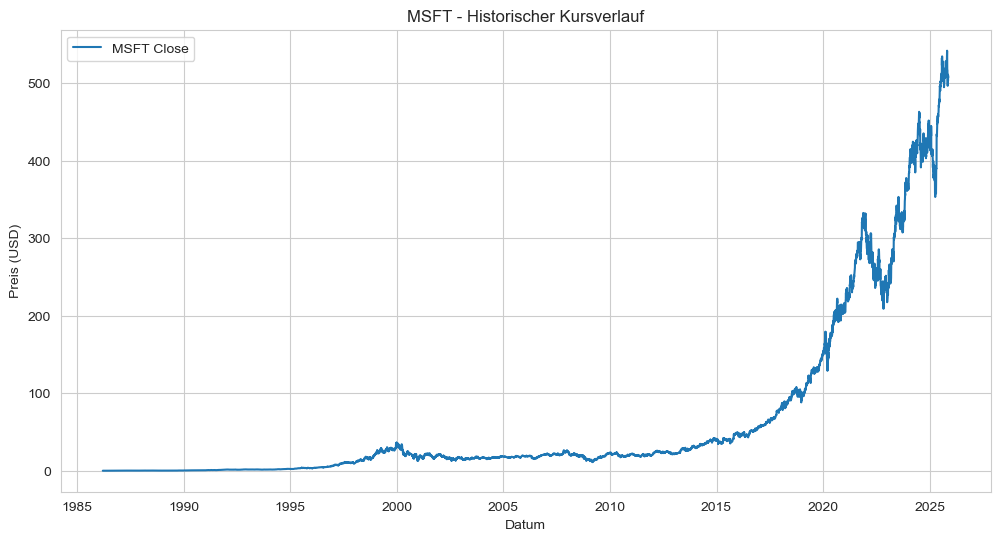

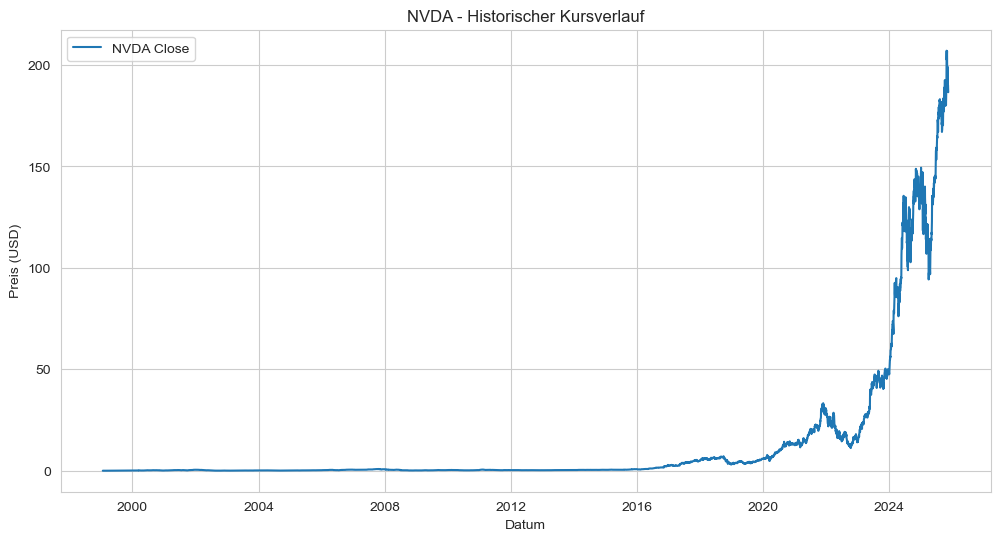

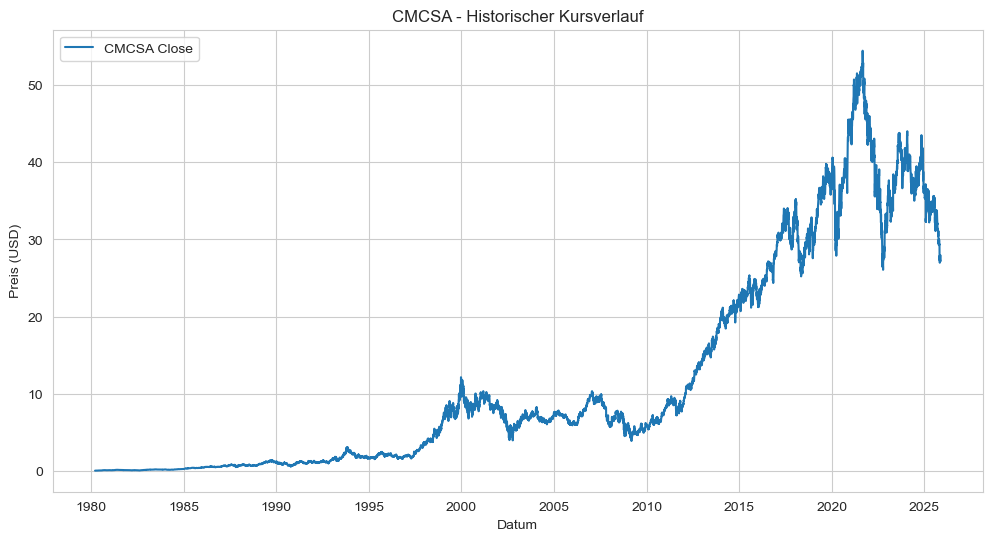

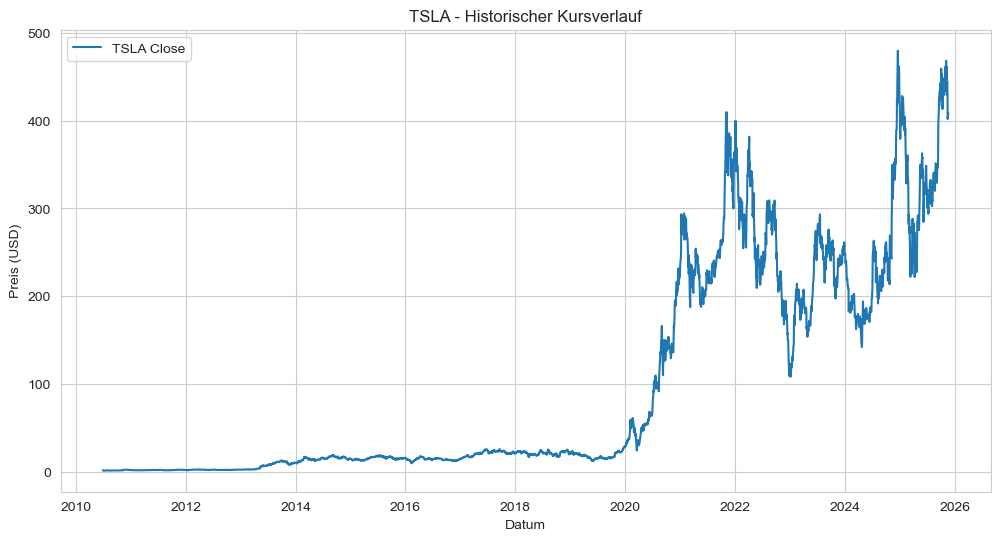

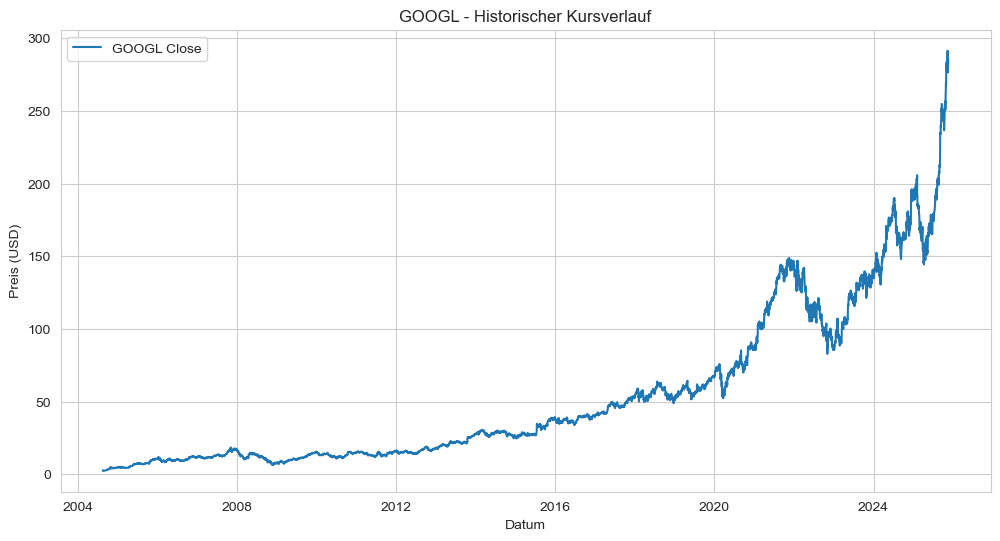

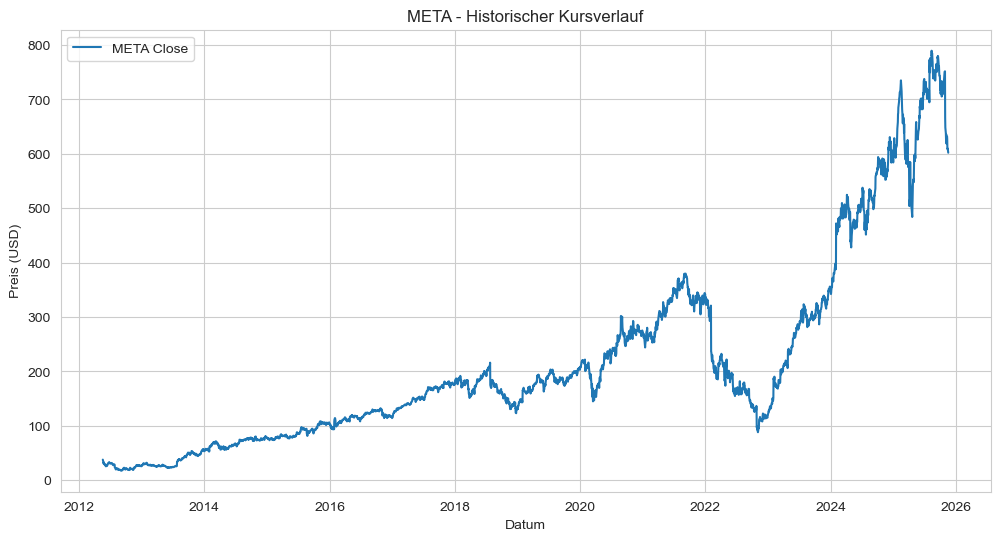

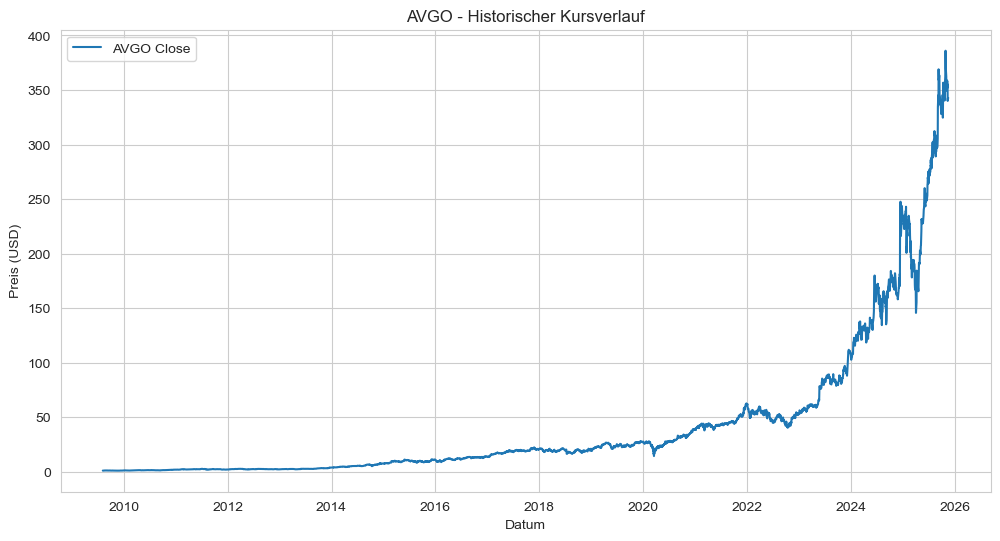

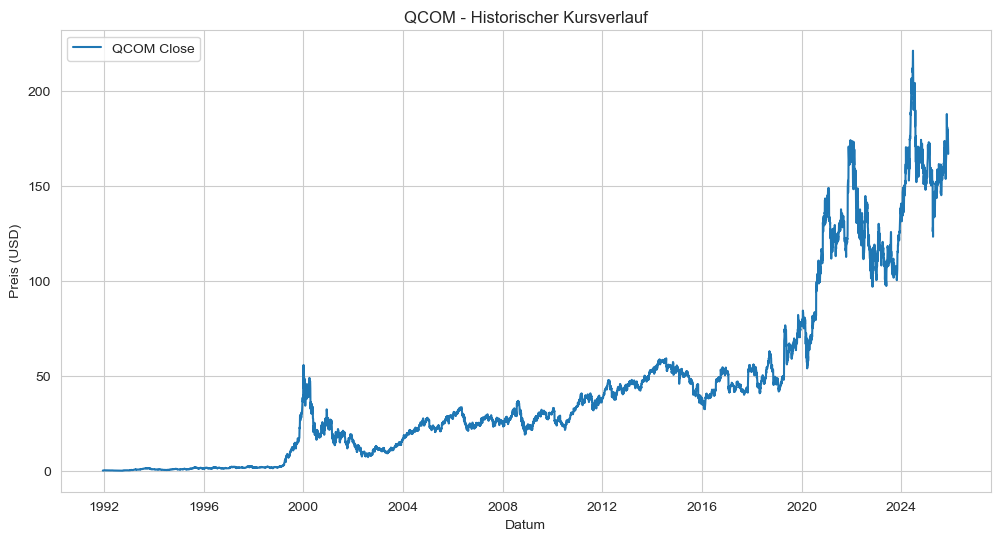

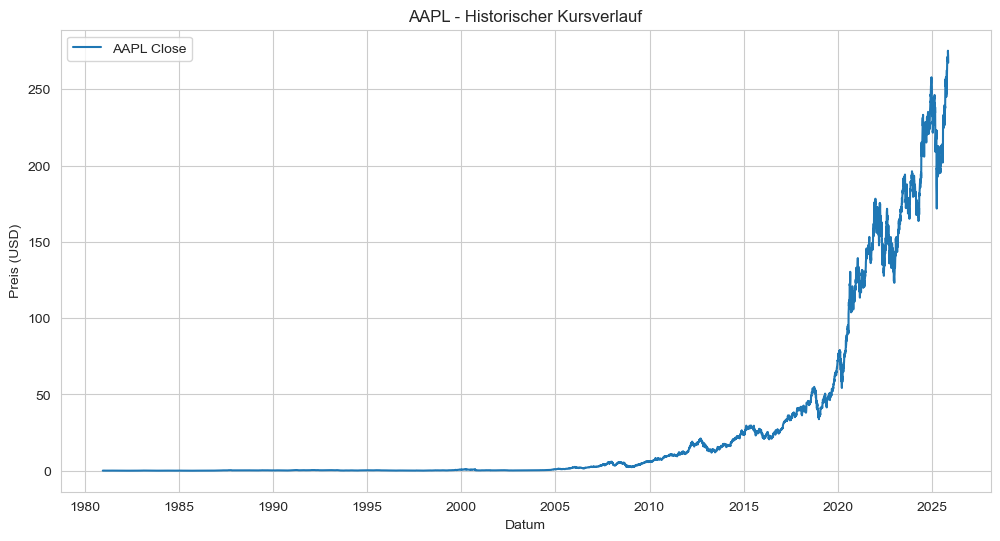

In [21]:
# pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ordner, in dem deine CSVs liegen
data_folder = "nasdaq100_data"

# Alle CSV-Dateien im Ordner auflisten
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

# Optional: Ästhetik für Plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Schleife über alle CSVs
for file in csv_files:
    ticker = file.replace(".csv", "")
    file_path = os.path.join(data_folder, file)
    
    # CSV einlesen
    df = pd.read_csv(file_path, index_col=0, parse_dates=True)
    
    # Check: Spalte "Close" vorhanden?
    if "Close" not in df.columns:
        print(f"Close-Spalte nicht gefunden in {ticker}, überspringe...")
        continue
    
    # Plot erstellen
    plt.figure()
    plt.plot(df.index, df["Close"], label=f"{ticker} Close")
    plt.title(f"{ticker} - Historischer Kursverlauf")
    plt.xlabel("Datum")
    plt.ylabel("Preis (USD)")
    plt.legend()
    plt.show()